In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.metrics import *
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import *
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [4]:
# IterativeImputer 결측치 없애기
train_df = train.copy()

colnames=['id','hour',
'hour_bef_temperature',
'hour_bef_precipitation',
'hour_bef_windspeed',
'hour_bef_humidity',
'hour_bef_visibility',
'hour_bef_ozone',
'hour_bef_pm10',
'hour_bef_pm2.5',
'count']

imputer = IterativeImputer(random_state=2021)
df_im = imputer.fit_transform(train_df)
train_df = pd.DataFrame(df_im)
train_df.columns = colnames

train_df = train_df.astype('int64')
train_df = train_df.drop(['id'],axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   hour                    1459 non-null   int64
 1   hour_bef_temperature    1459 non-null   int64
 2   hour_bef_precipitation  1459 non-null   int64
 3   hour_bef_windspeed      1459 non-null   int64
 4   hour_bef_humidity       1459 non-null   int64
 5   hour_bef_visibility     1459 non-null   int64
 6   hour_bef_ozone          1459 non-null   int64
 7   hour_bef_pm10           1459 non-null   int64
 8   hour_bef_pm2.5          1459 non-null   int64
 9   count                   1459 non-null   int64
dtypes: int64(10)
memory usage: 114.1 KB


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [5]:
test = test.copy()

colnames=['id','hour',
'hour_bef_temperature',
'hour_bef_precipitation',
'hour_bef_windspeed',
'hour_bef_humidity',
'hour_bef_visibility',
'hour_bef_ozone',
'hour_bef_pm10',
'hour_bef_pm2.5',
]

imputer = IterativeImputer(random_state=2021)
df_im = imputer.fit_transform(test)
test = pd.DataFrame(df_im)
test.columns = colnames


test=test.astype('int64')
test=test.drop(['id'],axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   hour                    715 non-null    int64
 1   hour_bef_temperature    715 non-null    int64
 2   hour_bef_precipitation  715 non-null    int64
 3   hour_bef_windspeed      715 non-null    int64
 4   hour_bef_humidity       715 non-null    int64
 5   hour_bef_visibility     715 non-null    int64
 6   hour_bef_ozone          715 non-null    int64
 7   hour_bef_pm10           715 non-null    int64
 8   hour_bef_pm2.5          715 non-null    int64
dtypes: int64(9)
memory usage: 50.4 KB


In [6]:
# 이상치 제거하기.

colnames2=['hour',
'hour_bef_temperature',
'hour_bef_precipitation',
'hour_bef_windspeed',
'hour_bef_humidity',
'hour_bef_visibility',
'hour_bef_ozone',
'hour_bef_pm10',
'hour_bef_pm2.5',
]


train_df2 = train_df.copy()

for col in colnames2:
    Q1 = train_df2[col].quantile(0.25)
    Q3 = train_df2[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col , IQR)

# 이상치 값을 NaN으로 변경
    train_df2[col] = np.where((train_df2[col] < Q1 - 1.5*IQR) | (train_df2[col] > Q3 + 1.5*IQR), np.nan, train_df2[col])

# NaN 값이 있는 행 제거
train_df2 = train_df2.dropna()

hour 12.0
hour_bef_temperature 8.0
hour_bef_precipitation 0.0
hour_bef_windspeed 2.0
hour_bef_humidity 32.5
hour_bef_visibility 1114.0
hour_bef_ozone 0.0
hour_bef_pm10 34.0
hour_bef_pm2.5 18.0


In [7]:
# 이상치 제거하기.

colnames2=['hour',
'hour_bef_temperature',
'hour_bef_precipitation',
'hour_bef_windspeed',
'hour_bef_humidity',
'hour_bef_visibility',
'hour_bef_ozone',
'hour_bef_pm10',
'hour_bef_pm2.5',
]


test2 = test.copy()

for col in colnames2:
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col , IQR)

# 이상치 값을 NaN으로 변경
    test[col] = np.where((test[col] < Q1 - 1.5*IQR) | (test[col] > Q3 + 1.5*IQR), np.nan, test[col])

# NaN 값이 있는 행 제거
test = test.dropna()

hour 11.5
hour_bef_temperature 6.0
hour_bef_precipitation 0.0
hour_bef_windspeed 2.0
hour_bef_humidity 31.5
hour_bef_visibility 1191.5
hour_bef_ozone 0.0
hour_bef_pm10 16.0
hour_bef_pm2.5 14.0


In [8]:
X = train_df2.drop(['count'],axis=1)
y = train_df2['count']
test_x = test2 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1048, 9) (1048,) (263, 9) (263,)


In [9]:
# StandardScaler 
def SS_model(df):
    model = make_pipeline(StandardScaler(),df())
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    print(df(),'rmse : ', round(rmse,1))


SS_model(LogisticRegression)
SS_model(Ridge)
SS_model(Lasso)
SS_model(DecisionTreeClassifier)
SS_model(RandomForestRegressor)

LogisticRegression() rmse :  67.2
Ridge() rmse :  51.6
Lasso() rmse :  51.6
DecisionTreeClassifier() rmse :  58.9
RandomForestRegressor() rmse :  38.5


In [10]:
# MinMaxScaler

def MM_model(df):
    model = make_pipeline(MinMaxScaler(),df())
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    print(df(),'rmse : ', round(rmse,1))


MM_model(LogisticRegression)
MM_model(Ridge)
MM_model(Lasso)
MM_model(DecisionTreeClassifier)
MM_model(RandomForestRegressor)

LogisticRegression() rmse :  74.7
Ridge() rmse :  51.6
Lasso() rmse :  52.0
DecisionTreeClassifier() rmse :  62.9
RandomForestRegressor() rmse :  37.7


In [11]:
# RobustScaler

def RS_model(df):
    model = make_pipeline(RobustScaler(),df())
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    print(df(),'rmse : ', round(rmse,1))

RS_model(LogisticRegression)
RS_model(Ridge)
RS_model(Lasso)
RS_model(DecisionTreeClassifier)
RS_model(RandomForestRegressor)

LogisticRegression() rmse :  71.2
Ridge() rmse :  51.6
Lasso() rmse :  51.7
DecisionTreeClassifier() rmse :  55.0
RandomForestRegressor() rmse :  38.9


<function matplotlib.pyplot.show(close=None, block=None)>

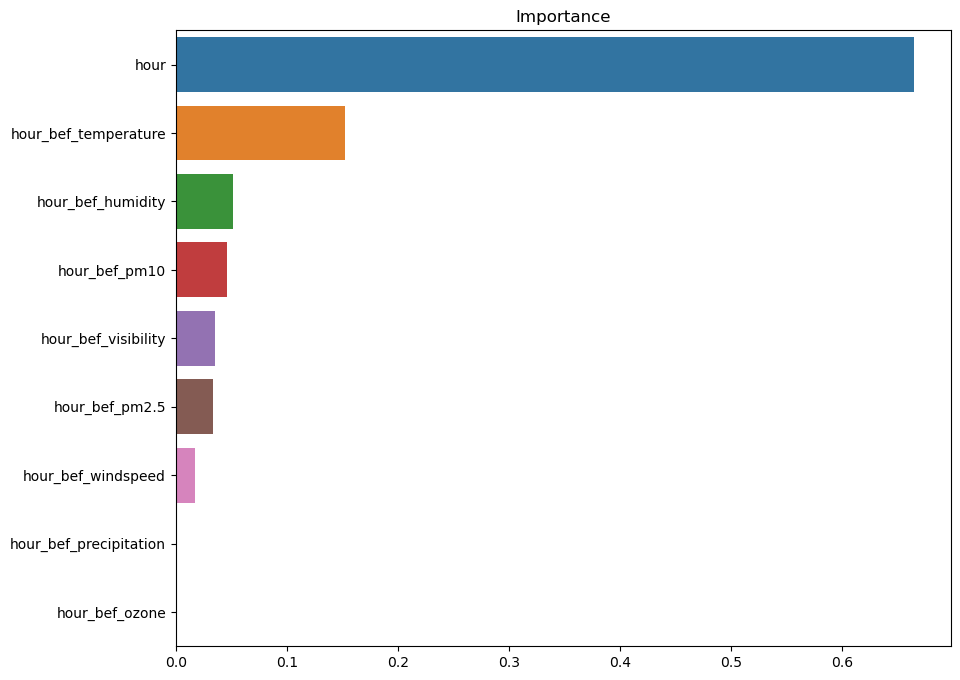

In [12]:
# 가장 rmse 작은 모델 submission 저장

model = RandomForestRegressor()
model.fit(X,y)

importance_val = model.feature_importances_
impotance = pd.Series(importance_val,index=X_train.columns)
top20 = impotance.sort_values(ascending=False)[:20]
plt.figure(figsize=(10,8))
plt.title('Importance')
sns.barplot(x=top20, y=top20.index)
plt.show
# pred_y = model.predict(test_x)
# submission = pd.read_csv('submission.csv')
# submission['count'] = pred_y
# submission.to_csv('jang44.csv',index = False)